<a href="https://colab.research.google.com/github/BedinEduardo/Colab_Repositories/blob/master/01_Exercise_PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Ercercices of PyTorch 01- ZTM


---



1. Create a straight line dataset using the linear regression formula (weight * X + bias).

In [ ]:
#starting with the libraries
import torch
from torch import nn ##Neural Networks
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
#Building the linear regression
weights = 0.3  #initial value
bias = 0.9  #initial value

#building the NN
start = 0
end = 3
step = 0.01
#defining the dataset
X = torch.arange(start, end, step).unsqueeze(dim=1)
#print(f"X: {X}")
y = weights * X + bias
print("\n")
#print(f"y: {y}")

In [ ]:
#spliting the data
training_split = int(0.8 * len(X))   #setting the plit for training

X_train, y_train = X[:training_split], y[:training_split]
X_test, y_test = X[training_split:], y[training_split]

In [ ]:
#Ploting the data
def plot_prediction(train_data= X_train,
                    train_label=y_train,
                    test_data=X_test,
                    y_data=y_test,
                    prediction=None):
  """
  Plots training data, test and compare predictions
  """
  plt.figure(figsize=(11,8))

  #ploting the training data - In blue
  plt.scatter(train_data, train_label, c="b", s=5, label="Traing data")

  #ploting the test data - In Green
  plt.scatter(test_data, y_data, c="g", s=5, label="Testing data")

  #Are there predictions?
  if prediction is not None: #if function receives a prediction
    plt.scatter(test_data, prediction, c="r", s=3, label="Predictions")

  #show the legends
  plt.legend(prop={"size":14});

###2. Build a PyTorch model by subclassing nn.Module.


In [ ]:
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b)

In [ ]:
#Once you've constructed the model, make an instance of it and check its state_dict().
#set manual seed
torch.manual_seed(42)

model = LinearRegressionModel()  #say to the code and build the model

#check the parameters wiht nn.module
print(f"parameters: {list(model.parameters())}")

parameters: [Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]


In [ ]:
model.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

###Build a loss function

In [ ]:
#set loss function
loss_fn = nn.L1Loss()   #using a PyTorch loss function

optmizer = torch.optim.SGD(params=model.parameters(),
                           lr = 0.001)

In [ ]:
#training loop
epochs = 150
epoch_count = []
training_loss_values = []
test_loss_values = []  #empty to save the parameters as needed

#starting the loop
#training
for epoch in range(epochs):  #count each epocj
  model.train()  #setting the model to train mode

  #forward pass
  y_pred = model(X_train)

  #calculate the loss
  loss = loss_fn(y_pred, y_train)  #get the predicted value and compare with the real

  #optmize zero_grad
  optmizer.zero_grad()  #set the gradient to zero - to start nex

  #perform backpropagation
  loss.backward()  #compute the gradient and adjust the bias ad weights values

  #Set the otpmizer
  optmizer.step()  #the same of zero_grad()

  #putting in model eval
  model.eval()

  with torch.inference_mode():  #setting inference mode
    test_pred = model(X_test)   #send the test dataset

    #calculate the loss
    test_loss = loss_fn(test_pred, y_test)

    #printing whats happens
    if epoch %10 == 0:
      epoch_count.append(epoch)
      training_loss_values.append(loss)
      test_loss_values.append(test_loss)

      print("Epoch: ", epoch, " |", "Loss: ", loss,"Test: ", test_loss)
      print(model.state_dict())


Epoch:  0  | Loss:  tensor(0.7225, grad_fn=<MeanBackward0>) Test:  tensor(0.5711)
OrderedDict([('weights', tensor([0.3403])), ('bias', tensor([0.1318]))])
Epoch:  10  | Loss:  tensor(0.6982, grad_fn=<MeanBackward0>) Test:  tensor(0.5289)
OrderedDict([('weights', tensor([0.3522])), ('bias', tensor([0.1418]))])
Epoch:  20  | Loss:  tensor(0.6739, grad_fn=<MeanBackward0>) Test:  tensor(0.4867)
OrderedDict([('weights', tensor([0.3642])), ('bias', tensor([0.1518]))])
Epoch:  30  | Loss:  tensor(0.6496, grad_fn=<MeanBackward0>) Test:  tensor(0.4445)
OrderedDict([('weights', tensor([0.3761])), ('bias', tensor([0.1618]))])
Epoch:  40  | Loss:  tensor(0.6254, grad_fn=<MeanBackward0>) Test:  tensor(0.4023)
OrderedDict([('weights', tensor([0.3881])), ('bias', tensor([0.1718]))])
Epoch:  50  | Loss:  tensor(0.6011, grad_fn=<MeanBackward0>) Test:  tensor(0.3601)
OrderedDict([('weights', tensor([0.4000])), ('bias', tensor([0.1818]))])
Epoch:  60  | Loss:  tensor(0.5768, grad_fn=<MeanBackward0>) Test

###Make predictions with the trained model on the test data.


In [ ]:
#prediticison
model.state_dict()

OrderedDict([('weights', tensor([0.5183])), ('bias', tensor([0.2808]))])

In [ ]:
#Making some predictions
with torch.inference_mode():  #inference mode
  y_pred_new = model(X_test)

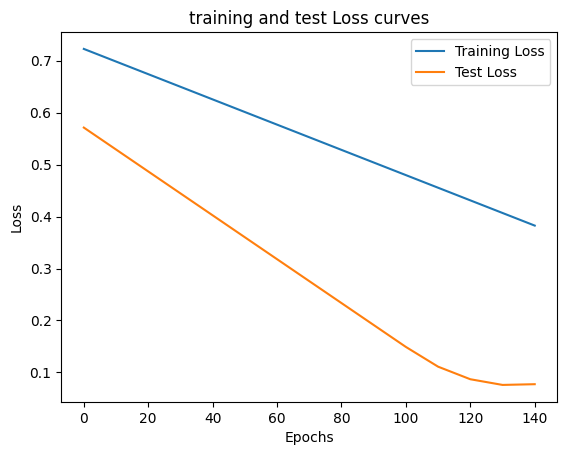

In [ ]:
###Plot loss curve
plt.plot(epoch_count, np.array(torch.tensor(training_loss_values).cpu().numpy()), label = "Training Loss")
#plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).cpu().numpy()), label = "Test Loss")
plt.plot(epoch_count, test_loss_values, label = "Test Loss")
plt.title("training and test Loss curves")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend();

###Save your trained model's state_dict() to file.


In [ ]:
#Saving Pytorch model
from matplotlib import Path

#build the model directory
MODEL_PATH = Path("Model")
MODEL_PATH.mkdir(parents=True, exist_ok=True)  #checking and creating model

#crete the model name and path
MODEL_NAME = "01_PyTorch_execices.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

print(f"(Model path: {MODEL_SAVE_PATH})")
#save the model
torch.save(obj=model.state_dict(),
           f=MODEL_SAVE_PATH)

(Model path: Model/01_PyTorch_execices.pth)


###Loading a PyTorch Model

In [ ]:
print(modeL.state_dict())
#To load in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_0 = LinearRegressionModel()

#load the saved state_sict of model 0 (this will update the new instance with updated parameters)

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))  #ALoading the model

NameError: name 'modeL' is not defined